## Calculate the number of fire incidents per station

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataloader
import geopandas as gpd

In [2]:
incidents_df = dataloader.load(range(2019,2020))
incidents_df.head()

,Unnamed: 0,agency_type,call_category,address_city,incident_number,jurisdiction,problem,date_response,address_state,address_zip,day_response,month_response,year_response
1540415,1575474,Fire,Emergency Medical Response,SAN DIEGO,FS19199783,San Diego,Emergency Medical Response,2019-12-30 16:00:17,CA,92101,30,12,2019
1540416,1575475,Fire,Urgent Medical Response,SAN DIEGO,FS19199782,San Diego,Urgent Medical Response,2019-12-30 15:55:40,CA,92123,30,12,2019
1540417,1575476,Fire,Emergency Medical Response,SAN DIEGO,FS19199781,San Diego,Emergency Medical Response,2019-12-30 15:53:47,CA,92129,30,12,2019
1540418,1575477,Fire,Emergency Medical Response,SAN DIEGO,FS19199780,San Diego,Emergency Medical Response,2019-12-30 15:52:35,CA,92154,30,12,2019
1540419,1575478,Fire,Non-Emergency Medical Response,SAN DIEGO,FS19199779,San Diego,Non-Emergency Medical Response,2019-12-30 15:52:00,CA,92119,30,12,2019


## Create a dataframe with num_stations

In [3]:
stations_df = pd.read_csv('./data/fire_station_position.csv')
stations_df.rename(columns={'zip':'address_zip'}, inplace=True)
stations_zip = stations_df['address_zip'].value_counts()

stations_zip_df = stations_zip.to_frame()
stations_zip_df.reset_index(inplace=True)
stations_zip_df.rename(columns={'address_zip':'num_stations','index':'address_zip'}, inplace=True)
stations_zip_df

,address_zip,num_stations
0,92101,4
1,92037,4
2,92130,3
3,92113,3
4,92103,2
5,92107,2
6,92110,2
7,92115,2
8,92154,2
9,92117,2


## Create a dataframe with num_incidents, num_stations, incidents_per_station based on zip

In [4]:
incidents_zip = incidents_df['address_zip'].value_counts()
incidents_zip_df = incidents_zip.to_frame()
incidents_zip_df.reset_index(inplace=True)
incidents_zip_df.rename(columns={'address_zip':'num_incidents','index':'address_zip'}, inplace=True)
incidents_per_station_df = incidents_zip_df.merge(stations_zip_df, on='address_zip', how='outer')
incidents_per_station_df['incidents_per_station'] = incidents_per_station_df['num_incidents']/incidents_per_station_df['num_stations']
incidents_per_station_df = incidents_per_station_df.fillna(0).sort_values(by='incidents_per_station', ascending=False)
incidents_per_station_df['address_zip'] = incidents_per_station_df['address_zip'].astype(str)
incidents_per_station_df.reset_index(drop=True, inplace=True)
incidents_per_station_df

,address_zip,num_incidents,num_stations,incidents_per_station
0,92105,7766.0,1.0,7766.000000
1,92114,6768.0,1.0,6768.000000
2,92109,6171.0,1.0,6171.000000
3,92101,23970.0,4.0,5992.500000
4,92102,5973.0,1.0,5973.000000
5,92173,5742.0,1.0,5742.000000
6,92111,4703.0,1.0,4703.000000
7,92108,4427.0,1.0,4427.000000
8,92104,4349.0,1.0,4349.000000
9,92115,7662.0,2.0,3831.000000


## Plot the heatmap of fire_incidents_per_station

/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hundredball/anaconda3/envs/ProgDS/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


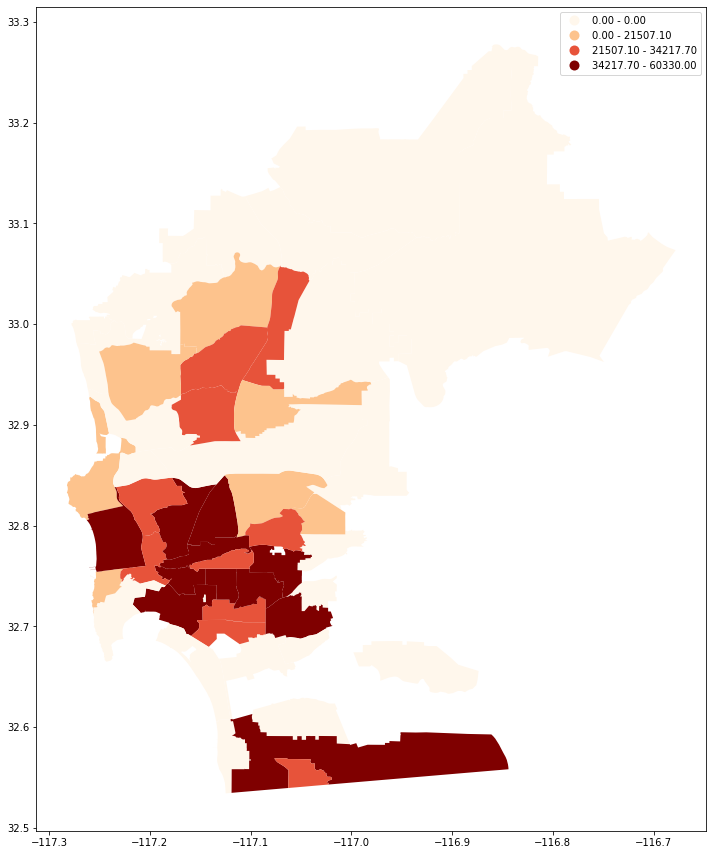

In [112]:
with open('./data/SanDiego_zipcode.txt', 'r') as f:
    zips = f.readline().strip().replace(',', '').split()
county = gpd.read_file('./data/san_diego_zip_codes.geojson')
san_diego = county[county['zip'].isin(zips)]
san_diego = san_diego.reset_index()
san_diego.rename(columns = {'zip':'address_zip'}, inplace = True)

# incidents over years
#years_df = dataloader.load(years)
#years_df['address_zip'] = years_df['address_zip'].fillna(0.0).astype(int).astype(str)
#years_incidents = pd.pivot_table(years_df, values='incident_number', index=['address_zip'], columns=[], aggfunc=np.ma.count, fill_value=0)
years_san_diego = san_diego.merge(incidents_per_station_df, on = 'address_zip', how = 'inner')
ax = years_san_diego.plot(column = 'incidents_per_station', scheme = 'quantiles', legend=True, cmap = 'OrRd', figsize=(12,20))
plt.show()

## Add one fire station to first five hottest areas and recalculate incidents_per_station

In [111]:

incidents_per_station_df.loc[0:4, 'num_stations'] += 1
incidents_per_station_df['incidents_per_station'] = incidents_per_station_df['num_incidents']/incidents_per_station_df['num_stations']
incidents_per_station_df.replace(np.inf, 0, inplace=True)
incidents_per_station_df

,address_zip,num_incidents,num_stations,incidents_per_station
0,92105,88173.0,2.0,44086.500000
1,92114,74693.0,2.0,37346.500000
2,92109,69013.0,2.0,34506.500000
3,92102,66125.0,2.0,33062.500000
4,92173,60533.0,2.0,30266.500000
5,92101,241320.0,4.0,60330.000000
6,92104,53403.0,1.0,53403.000000
7,92111,51904.0,1.0,51904.000000
8,92108,45120.0,1.0,45120.000000
9,92123,42132.0,1.0,42132.000000


## Plot the variance of incidents_per_station over adding stations

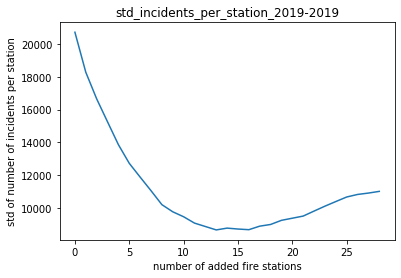

In [128]:
std_list = []

stations_df = pd.read_csv('./data/fire_station_position.csv')
stations_df.rename(columns={'zip':'address_zip'}, inplace=True)
stations_zip = stations_df['address_zip'].value_counts()

stations_zip_df = stations_zip.to_frame()
stations_zip_df.reset_index(inplace=True)
stations_zip_df.rename(columns={'address_zip':'num_stations','index':'address_zip'}, inplace=True)

incidents_zip = incidents_df['address_zip'].value_counts()
incidents_zip_df = incidents_zip.to_frame()
incidents_zip_df.reset_index(inplace=True)
incidents_zip_df.rename(columns={'address_zip':'num_incidents','index':'address_zip'}, inplace=True)
incidents_per_station_df = incidents_zip_df.merge(stations_zip_df, on='address_zip', how='outer')
incidents_per_station_df['incidents_per_station'] = incidents_per_station_df['num_incidents']/incidents_per_station_df['num_stations']
incidents_per_station_df = incidents_per_station_df.fillna(0).sort_values(by='incidents_per_station', ascending=False)
incidents_per_station_df['address_zip'] = incidents_per_station_df['address_zip'].astype(str)
incidents_per_station_df.reset_index(drop=True, inplace=True)

# remove samples with no stations
incidents_per_station_df = incidents_per_station_df[incidents_per_station_df['incidents_per_station']!=0]
std_list.append(incidents_per_station_df['incidents_per_station'].std())

for i in range(len(incidents_per_station_df)):
    incidents_per_station_df.loc[i, 'num_stations'] += 1
    incidents_per_station_df['incidents_per_station'] = incidents_per_station_df['num_incidents']/incidents_per_station_df['num_stations']
    incidents_per_station_df.replace(np.inf, 0, inplace=True)
    std_list.append(incidents_per_station_df['incidents_per_station'].std())
    
title = 'std_incidents_per_station_%d-%d'%(2019,2019)
plt.plot(std_list)
plt.xlabel('number of added fire stations')
plt.ylabel('std of number of incidents per station')
plt.title(title)
plt.savefig(title + '.png')
plt.show()
